# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env_file_name = "Tennis_Windows_x86_64/Tennis.exe"
# env = UnityEnvironment(file_name=env_file_name)
env = UnityEnvironment(file_name=env_file_name,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('states shape : ',states.shape)
print('Both states look like : ',states)
print(2*states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
states shape :  (2, 24)
Both states look like :  [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
if False:
    total_scores = []
    for i in range(100):                                        # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        t = 0
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            # print('actions : ',actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            t += 1
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}, and {} steps taken'.format(i, np.max(scores),t))
        print(scores)
        total_scores.append(scores)
    print('Average Random Score : ', np.mean(total_scores))
        
def plot_results(results):
    import matplotlib.pyplot as plt
    import torch
    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.all_rewards)), results.all_rewards)
    plt.plot(np.arange(len(results.avg_rewards)), results.avg_rewards)
    plt.ylabel('Rewards')
    plt.xlabel('Episode #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.critic_loss)), results.critic_loss)
    plt.ylabel('critic_losses')
    plt.xlabel('Learn Step #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.actor_loss)), results.actor_loss)
    plt.ylabel('actor_losses')
    plt.xlabel('Learn Step #')
    plt.show()


When finished, you can close the environment.

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 512
dropout              : 0.01
seed                 : 89
max_episodes         : 2000
learn_every          : 10
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9995
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  1.000 || 0.073 seconds, mem : 15


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 20 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.990 || 0.064 seconds, mem : 299


--------------------------------------
Agent 0 and episode 40 
update - q expected : mean : 0.0479 - sd : 0.0079 min-max 0.0217|0.0612
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0048 - sd : 0.0102 min-max -0.0493|0.0040
--------------------------------------
Agent 1 and episode 40 
update - q expected : mean : 0.0478 - sd : 0.0076 min-max 0.0255|0.0618
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0054 - sd : 0.0113 min-max -0.0577|0.0051
Episode 40 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.980 || 0.284 seconds, mem : 583


--------------------------------------
Agent 0 and episode 50 
update - q expected : mean : 0.0105 - sd : 0.0136 min-max -0.0359|0.0372
update - reward : mean : -0.0002 - sd : 0.0013 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0328 - sd : 0.0117 min-max -0.0135|0.0561
--------------------------------------
Agent 1 and episode 50 
update - q expected : mean : 0.0101 - sd : 0.0132 min-max -0.0490|0.0342
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0328 - sd : 0.0137 min-max -0.0333|0.0582


--------------------------------------
Agent 0 and episode 60 
update - q expected : mean : 0.0351 - sd : 0.0119 min-max -0.0040|0.0504
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0074 - sd : 0.0086 min-max -0.0342|0.0239
--------------------------------------
Agent 1 and episode 60 
update - q expected : mean : 0.0343 - sd : 0.0112 min-max -0.0054|0.0482
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0077 - sd : 0.0093 min-max -0.0402|0.0269
Episode 60 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.970 || 0.150 seconds, mem : 867
--------------------------------------
Agent 0 and episode 70 
update - q expected : mean : 0.0547 - sd : 0.0137 min-max 0.0187|0.0785
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0126 - sd : 0.0103 min-max -0.0488|0.0021
--------------------------------------
Agent 1 and episode 70 
up

--------------------------------------
Agent 0 and episode 80 
update - q expected : mean : 0.0612 - sd : 0.0132 min-max 0.0325|0.0882
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0181 - sd : 0.0104 min-max -0.0561|-0.0010
--------------------------------------
Agent 1 and episode 80 
update - q expected : mean : 0.0607 - sd : 0.0138 min-max 0.0271|0.0911
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0182 - sd : 0.0107 min-max -0.0617|0.0011
Episode 80 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.960 || 0.158 seconds, mem : 1151
--------------------------------------
Agent 0 and episode 90 
update - q expected : mean : 0.0595 - sd : 0.0115 min-max 0.0277|0.0814
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0172 - sd : 0.0104 min-max -0.0547|0.0005
--------------------------------------
Agent 1 and episode 90 


Episode 95 || Reward : [0.1  0.09] || avg reward :  0.001 || Noise  0.953 || 0.135 seconds, mem : 1390
Episode 99 || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.951 || 0.118 seconds, mem : 1474
--------------------------------------
Agent 0 and episode 100 
update - q expected : mean : 0.0547 - sd : 0.0092 min-max 0.0217|0.0705
update - reward : mean : -0.0001 - sd : 0.0012 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0107 - sd : 0.0085 min-max -0.0482|0.0045
--------------------------------------
Agent 1 and episode 100 
update - q expected : mean : 0.0544 - sd : 0.0109 min-max 0.0215|0.0734
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0113 - sd : 0.0091 min-max -0.0630|0.0117
Episode 100 || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.951 || 0.148 seconds, mem : 1488
Episode 101 || Reward : [-0.01  0.1 ] || avg reward :  0.003 || Noise  0.950 || 0.117 seconds, mem : 1520


Episode 105 || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.948 || 0.081 seconds, mem : 1602
Episode 106 || Reward : [0.   0.09] || avg reward :  0.005 || Noise  0.948 || 0.066 seconds, mem : 1621
Episode 107 || Reward : [-0.01  0.1 ] || avg reward :  0.006 || Noise  0.947 || 0.081 seconds, mem : 1644
Episode 109 || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.946 || 0.092 seconds, mem : 1685
--------------------------------------
Agent 0 and episode 110 
update - q expected : mean : 0.0493 - sd : 0.0088 min-max 0.0221|0.0618
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0070 - sd : 0.0103 min-max -0.0622|0.0088
--------------------------------------
Agent 1 and episode 110 
update - q expected : mean : 0.0490 - sd : 0.0105 min-max 0.0139|0.0639
update - reward : mean : 0.0002 - sd : 0.0092 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0064 - sd : 0.0137 min-max -0.0589|0.0986
Episode 110 || Reward :

Episode 119 || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.942 || 0.078 seconds, mem : 1878
--------------------------------------
Agent 0 and episode 120 
update - q expected : mean : 0.0444 - sd : 0.0094 min-max 0.0039|0.0549
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0108 min-max -0.0489|0.1087
--------------------------------------
Agent 1 and episode 120 
update - q expected : mean : 0.0441 - sd : 0.0111 min-max 0.0048|0.0557
update - reward : mean : 0.0000 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0109 min-max -0.0454|0.1019
Episode 120 || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.941 || 0.158 seconds, mem : 1893
Episode 125 || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.939 || 0.089 seconds, mem : 1980
Episode 128 || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.938 || 0.086 seconds, mem : 2033
-----------------------

--------------------------------------
Agent 0 and episode 140 
update - q expected : mean : 0.0376 - sd : 0.0118 min-max -0.0123|0.0506
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0074 - sd : 0.0104 min-max -0.0482|0.1180
--------------------------------------
Agent 1 and episode 140 
update - q expected : mean : 0.0377 - sd : 0.0129 min-max -0.0128|0.0508
update - reward : mean : 0.0003 - sd : 0.0076 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0073 - sd : 0.0114 min-max -0.0411|0.1104
Episode 140 || Reward : [-0.01  0.  ] || avg reward :  0.014 || Noise  0.932 || 0.160 seconds, mem : 2204


--------------------------------------
Agent 0 and episode 150 
update - q expected : mean : 0.0365 - sd : 0.0123 min-max -0.0125|0.0499
update - reward : mean : 0.0003 - sd : 0.0079 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0075 - sd : 0.0119 min-max -0.0479|0.1051
--------------------------------------
Agent 1 and episode 150 
update - q expected : mean : 0.0366 - sd : 0.0130 min-max -0.0195|0.0502
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0065 - sd : 0.0100 min-max -0.0396|0.0482
--------------------------------------
Agent 0 and episode 160 
update - q expected : mean : 0.0368 - sd : 0.0122 min-max -0.0149|0.0509
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0072 - sd : 0.0093 min-max -0.0374|0.0451
--------------------------------------
Agent 1 and episode 160 
update - q expected : mean : 0.0370 - sd : 0.0129 min-max -0.0196|0.0493
update - reward : mean : 0.000

--------------------------------------
Agent 0 and episode 170 
update - q expected : mean : 0.0379 - sd : 0.0117 min-max -0.0071|0.0507
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0057 - sd : 0.0101 min-max -0.0378|0.1158
--------------------------------------
Agent 1 and episode 170 
update - q expected : mean : 0.0382 - sd : 0.0115 min-max -0.0065|0.0500
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0050 - sd : 0.0099 min-max -0.0430|0.1002
--------------------------------------
Agent 0 and episode 180 
update - q expected : mean : 0.0396 - sd : 0.0104 min-max -0.0006|0.0513
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0053 - sd : 0.0097 min-max -0.0351|0.1033
--------------------------------------
Agent 1 and episode 180 
update - q expected : mean : 0.0401 - sd : 0.0099 min-max -0.0040|0.0501
update - reward : mean : 0.000

--------------------------------------
Agent 0 and episode 190 
update - q expected : mean : 0.0413 - sd : 0.0090 min-max 0.0076|0.0521
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0015 - sd : 0.0109 min-max -0.0381|0.1099
--------------------------------------
Agent 1 and episode 190 
update - q expected : mean : 0.0417 - sd : 0.0086 min-max 0.0078|0.0511
update - reward : mean : -0.0000 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0013 - sd : 0.0122 min-max -0.0445|0.1009


--------------------------------------
Agent 0 and episode 200 
update - q expected : mean : 0.0431 - sd : 0.0084 min-max 0.0055|0.0526
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0110 min-max -0.0381|0.0988
--------------------------------------
Agent 1 and episode 200 
update - q expected : mean : 0.0431 - sd : 0.0081 min-max 0.0123|0.0517
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0105 min-max -0.0430|0.0986
Episode 200 || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.904 || 0.144 seconds, mem : 3056
--------------------------------------
Agent 0 and episode 210 
update - q expected : mean : 0.0440 - sd : 0.0083 min-max 0.0095|0.0528
update - reward : mean : 0.0000 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0112 min-max -0.0554|0.1043
--------------------------------------
Agent 1 and episode 210 

--------------------------------------
Agent 0 and episode 220 
update - q expected : mean : 0.0450 - sd : 0.0080 min-max 0.0123|0.0534
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0025 - sd : 0.0104 min-max -0.0373|0.1027
--------------------------------------
Agent 1 and episode 220 
update - q expected : mean : 0.0445 - sd : 0.0079 min-max 0.0148|0.0521
update - reward : mean : -0.0004 - sd : 0.0050 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0025 - sd : 0.0111 min-max -0.0462|0.0957
Episode 220 || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.895 || 0.165 seconds, mem : 3340


--------------------------------------
Agent 0 and episode 230 
update - q expected : mean : 0.0453 - sd : 0.0085 min-max 0.0125|0.0536
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0019 - sd : 0.0101 min-max -0.0358|0.0948
--------------------------------------
Agent 1 and episode 230 
update - q expected : mean : 0.0448 - sd : 0.0082 min-max 0.0150|0.0532
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0014 - sd : 0.0100 min-max -0.0397|0.0957
--------------------------------------
Agent 0 and episode 240 
update - q expected : mean : 0.0454 - sd : 0.0090 min-max 0.0144|0.0546
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0017 - sd : 0.0090 min-max -0.0347|0.0945
--------------------------------------
Agent 1 and episode 240 
update - q expected : mean : 0.0445 - sd : 0.0092 min-max 0.0164|0.0532
update - reward : mean : -0.0001

--------------------------------------
Agent 0 and episode 250 
update - q expected : mean : 0.0450 - sd : 0.0098 min-max 0.0122|0.0550
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0020 - sd : 0.0086 min-max -0.0362|0.0206
--------------------------------------
Agent 1 and episode 250 
update - q expected : mean : 0.0440 - sd : 0.0100 min-max 0.0140|0.0533
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0014 - sd : 0.0086 min-max -0.0439|0.0210


--------------------------------------
Agent 0 and episode 260 
update - q expected : mean : 0.0444 - sd : 0.0106 min-max 0.0090|0.0556
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0014 - sd : 0.0101 min-max -0.0420|0.0941
--------------------------------------
Agent 1 and episode 260 
update - q expected : mean : 0.0435 - sd : 0.0112 min-max 0.0107|0.0538
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0083 min-max -0.0294|0.0228
Episode 260 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.878 || 0.149 seconds, mem : 3908
--------------------------------------
Agent 0 and episode 270 
update - q expected : mean : 0.0439 - sd : 0.0121 min-max 0.0084|0.0556
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0016 - sd : 0.0082 min-max -0.0553|0.0237
--------------------------------------
Agent 1 and episode 27

--------------------------------------
Agent 0 and episode 280 
update - q expected : mean : 0.0435 - sd : 0.0125 min-max 0.0071|0.0555
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0013 - sd : 0.0089 min-max -0.0261|0.0946
--------------------------------------
Agent 1 and episode 280 
update - q expected : mean : 0.0426 - sd : 0.0132 min-max 0.0011|0.0546
update - reward : mean : -0.0001 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0102 min-max -0.0328|0.1025
Episode 280 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.869 || 0.163 seconds, mem : 4192
--------------------------------------
Agent 0 and episode 290 
update - q expected : mean : 0.0428 - sd : 0.0134 min-max -0.0033|0.0552
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0084 min-max -0.0538|0.0235
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 300 
update - q expected : mean : 0.0424 - sd : 0.0138 min-max -0.0002|0.0548
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0000 - sd : 0.0100 min-max -0.0533|0.0960
--------------------------------------
Agent 1 and episode 300 
update - q expected : mean : 0.0421 - sd : 0.0140 min-max -0.0051|0.0541
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0000 - sd : 0.0091 min-max -0.0449|0.0975
Episode 300 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.860 || 0.143 seconds, mem : 4476


--------------------------------------
Agent 0 and episode 310 
update - q expected : mean : 0.0422 - sd : 0.0143 min-max -0.0059|0.0545
update - reward : mean : 0.0004 - sd : 0.0078 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0010 - sd : 0.0106 min-max -0.0515|0.0983
--------------------------------------
Agent 1 and episode 310 
update - q expected : mean : 0.0425 - sd : 0.0145 min-max -0.0076|0.0545
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0004 - sd : 0.0088 min-max -0.0433|0.1021
--------------------------------------
Agent 0 and episode 320 
update - q expected : mean : 0.0421 - sd : 0.0143 min-max -0.0094|0.0543
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0082 min-max -0.0297|0.0218
--------------------------------------
Agent 1 and episode 320 
update - q expected : mean : 0.0424 - sd : 0.0140 min-max -0.0123|0.0548
update - reward : mean : -0.0

--------------------------------------
Agent 0 and episode 330 
update - q expected : mean : 0.0421 - sd : 0.0142 min-max -0.0087|0.0541
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0078 min-max -0.0335|0.0243
--------------------------------------
Agent 1 and episode 330 
update - q expected : mean : 0.0427 - sd : 0.0139 min-max -0.0062|0.0543
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0006 - sd : 0.0088 min-max -0.0316|0.1000


--------------------------------------
Agent 0 and episode 340 
update - q expected : mean : 0.0426 - sd : 0.0131 min-max -0.0014|0.0542
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0076 min-max -0.0404|0.0237
--------------------------------------
Agent 1 and episode 340 
update - q expected : mean : 0.0430 - sd : 0.0127 min-max -0.0013|0.0544
update - reward : mean : 0.0001 - sd : 0.0062 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0000 - sd : 0.0087 min-max -0.0428|0.0994
Episode 340 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.843 || 0.236 seconds, mem : 5044
--------------------------------------
Agent 0 and episode 350 
update - q expected : mean : 0.0429 - sd : 0.0132 min-max -0.0042|0.0537
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0019 - sd : 0.0068 min-max -0.0340|0.0179
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 360 
update - q expected : mean : 0.0433 - sd : 0.0127 min-max -0.0084|0.0534
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0012 - sd : 0.0091 min-max -0.0504|0.0980
--------------------------------------
Agent 1 and episode 360 
update - q expected : mean : 0.0435 - sd : 0.0126 min-max -0.0022|0.0544
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0015 - sd : 0.0076 min-max -0.0433|0.0988
Episode 360 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.835 || 0.157 seconds, mem : 5328


--------------------------------------
Agent 0 and episode 370 
update - q expected : mean : 0.0430 - sd : 0.0120 min-max -0.0009|0.0536
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0018 - sd : 0.0087 min-max -0.0516|0.0969
--------------------------------------
Agent 1 and episode 370 
update - q expected : mean : 0.0430 - sd : 0.0123 min-max 0.0074|0.0540
update - reward : mean : 0.0001 - sd : 0.0062 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0016 - sd : 0.0086 min-max -0.0437|0.1029
--------------------------------------
Agent 0 and episode 380 
update - q expected : mean : 0.0430 - sd : 0.0120 min-max 0.0001|0.0535
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0022 - sd : 0.0067 min-max -0.0270|0.0218
--------------------------------------
Agent 1 and episode 380 
update - q expected : mean : 0.0428 - sd : 0.0123 min-max 0.0049|0.0541
update - reward : mean : -0.00

--------------------------------------
Agent 0 and episode 390 
update - q expected : mean : 0.0424 - sd : 0.0128 min-max -0.0004|0.0531
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0060 min-max -0.0269|0.0259
--------------------------------------
Agent 1 and episode 390 
update - q expected : mean : 0.0422 - sd : 0.0131 min-max -0.0024|0.0533
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0006 - sd : 0.0074 min-max -0.0246|0.0977
--------------------------------------
Agent 0 and episode 400 
update - q expected : mean : 0.0422 - sd : 0.0124 min-max -0.0053|0.0531
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0089 min-max -0.0319|0.0963
--------------------------------------
Agent 1 and episode 400 
update - q expected : mean : 0.0417 - sd : 0.0130 min-max -0.0097|0.0536
update - reward : mean : -0.

--------------------------------------
Agent 0 and episode 410 
update - q expected : mean : 0.0415 - sd : 0.0126 min-max -0.0035|0.0526
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0077 min-max -0.0249|0.0945
--------------------------------------
Agent 1 and episode 410 
update - q expected : mean : 0.0414 - sd : 0.0130 min-max -0.0052|0.0530
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0075 min-max -0.0302|0.0987


--------------------------------------
Agent 0 and episode 420 
update - q expected : mean : 0.0412 - sd : 0.0130 min-max -0.0090|0.0528
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0064 min-max -0.0383|0.0326
--------------------------------------
Agent 1 and episode 420 
update - q expected : mean : 0.0412 - sd : 0.0136 min-max -0.0109|0.0529
update - reward : mean : -0.0001 - sd : 0.0063 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0076 min-max -0.0257|0.0958
Episode 420 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.810 || 0.139 seconds, mem : 6180
--------------------------------------
Agent 0 and episode 430 
update - q expected : mean : 0.0411 - sd : 0.0130 min-max -0.0052|0.0524
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0070 min-max -0.0189|0.0938
--------------------------------------
Agent 1 and episode

--------------------------------------
Agent 0 and episode 440 
update - q expected : mean : 0.0414 - sd : 0.0123 min-max -0.0066|0.0524
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0067 min-max -0.0199|0.0927
--------------------------------------
Agent 1 and episode 440 
update - q expected : mean : 0.0415 - sd : 0.0120 min-max 0.0015|0.0527
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0052 min-max -0.0218|0.0267
Episode 440 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.802 || 0.152 seconds, mem : 6464
--------------------------------------
Agent 0 and episode 450 
update - q expected : mean : 0.0413 - sd : 0.0114 min-max -0.0015|0.0521
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0057 min-max -0.0325|0.0189
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 460 
update - q expected : mean : 0.0412 - sd : 0.0114 min-max -0.0061|0.0521
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0058 min-max -0.0282|0.0216
--------------------------------------
Agent 1 and episode 460 
update - q expected : mean : 0.0413 - sd : 0.0113 min-max -0.0024|0.0523
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0053 min-max -0.0286|0.0207
Episode 460 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.794 || 0.151 seconds, mem : 6748


--------------------------------------
Agent 0 and episode 470 
update - q expected : mean : 0.0413 - sd : 0.0115 min-max -0.0031|0.0518
update - reward : mean : 0.0003 - sd : 0.0079 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0096 min-max -0.0319|0.1029
--------------------------------------
Agent 1 and episode 470 
update - q expected : mean : 0.0414 - sd : 0.0119 min-max -0.0045|0.0522
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0056 min-max -0.0321|0.0201
--------------------------------------
Agent 0 and episode 480 
update - q expected : mean : 0.0410 - sd : 0.0122 min-max -0.0118|0.0556
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0055 min-max -0.0395|0.0254
--------------------------------------
Agent 1 and episode 480 
update - q expected : mean : 0.0408 - sd : 0.0125 min-max -0.0117|0.0525
update - reward : mean : -0

--------------------------------------
Agent 0 and episode 490 
update - q expected : mean : 0.0408 - sd : 0.0115 min-max -0.0038|0.0521
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0058 min-max -0.0273|0.0196
--------------------------------------
Agent 1 and episode 490 
update - q expected : mean : 0.0403 - sd : 0.0122 min-max -0.0052|0.0523
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0051 min-max -0.0288|0.0181
--------------------------------------
Agent 0 and episode 500 
update - q expected : mean : 0.0400 - sd : 0.0127 min-max -0.0042|0.0570
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0067 min-max -0.0227|0.0893
--------------------------------------
Agent 1 and episode 500 
update - q expected : mean : 0.0394 - sd : 0.0139 min-max -0.0170|0.0520
update - reward : mean : -0

--------------------------------------
Agent 0 and episode 510 
update - q expected : mean : 0.0399 - sd : 0.0120 min-max -0.0030|0.0512
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0075 min-max -0.0416|0.1001
--------------------------------------
Agent 1 and episode 510 
update - q expected : mean : 0.0390 - sd : 0.0144 min-max -0.0214|0.0521
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0017 - sd : 0.0061 min-max -0.0107|0.0927
Episode 513 || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.773 || 0.178 seconds, mem : 7538


--------------------------------------
Agent 0 and episode 520 
update - q expected : mean : 0.0397 - sd : 0.0128 min-max -0.0069|0.0536
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0076 min-max -0.0529|0.0912
--------------------------------------
Agent 1 and episode 520 
update - q expected : mean : 0.0389 - sd : 0.0145 min-max -0.0156|0.0524
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0046 min-max -0.0214|0.0238
Episode 520 || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.771 || 0.159 seconds, mem : 7638
--------------------------------------
Agent 0 and episode 530 
update - q expected : mean : 0.0391 - sd : 0.0129 min-max -0.0089|0.0526
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0012 - sd : 0.0070 min-max -0.0463|0.0318
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 540 
update - q expected : mean : 0.0392 - sd : 0.0129 min-max -0.0123|0.0551
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0013 - sd : 0.0072 min-max -0.0320|0.0881
--------------------------------------
Agent 1 and episode 540 
update - q expected : mean : 0.0399 - sd : 0.0129 min-max -0.0115|0.0515
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0046 min-max -0.0241|0.0426
Episode 540 || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.763 || 0.142 seconds, mem : 7957
Episode 545 || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.761 || 0.111 seconds, mem : 8045


--------------------------------------
Agent 0 and episode 550 
update - q expected : mean : 0.0394 - sd : 0.0129 min-max -0.0064|0.0539
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0005 - sd : 0.0064 min-max -0.0566|0.0276
--------------------------------------
Agent 1 and episode 550 
update - q expected : mean : 0.0403 - sd : 0.0131 min-max -0.0119|0.0530
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0050 min-max -0.0402|0.0196
Episode 550 || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.759 || 0.227 seconds, mem : 8131
--------------------------------------
Agent 0 and episode 560 
update - q expected : mean : 0.0394 - sd : 0.0130 min-max -0.0088|0.0516
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0058 min-max -0.0383|0.0255
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 570 
update - q expected : mean : 0.0400 - sd : 0.0122 min-max -0.0085|0.0607
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0006 - sd : 0.0080 min-max -0.0191|0.0922
--------------------------------------
Agent 1 and episode 570 
update - q expected : mean : 0.0409 - sd : 0.0116 min-max -0.0047|0.0527
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0047 min-max -0.0301|0.0163
--------------------------------------
Agent 0 and episode 580 
update - q expected : mean : 0.0405 - sd : 0.0120 min-max -0.0071|0.0545
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0070 min-max -0.0290|0.0964
--------------------------------------
Agent 1 and episode 580 
update - q expected : mean : 0.0408 - sd : 0.0122 min-max -0.0147|0.0522
update - reward : mean : -0.

--------------------------------------
Agent 0 and episode 590 
update - q expected : mean : 0.0410 - sd : 0.0111 min-max -0.0009|0.0623
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0016 - sd : 0.0073 min-max -0.0331|0.0845
--------------------------------------
Agent 1 and episode 590 
update - q expected : mean : 0.0406 - sd : 0.0119 min-max -0.0082|0.0532
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0011 - sd : 0.0063 min-max -0.0244|0.0914


--------------------------------------
Agent 0 and episode 600 
update - q expected : mean : 0.0409 - sd : 0.0110 min-max -0.0050|0.0571
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0066 min-max -0.0247|0.0857
--------------------------------------
Agent 1 and episode 600 
update - q expected : mean : 0.0402 - sd : 0.0127 min-max -0.0234|0.0524
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0044 min-max -0.0181|0.0266
Episode 600 || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.740 || 0.145 seconds, mem : 8841
--------------------------------------
Agent 0 and episode 610 
update - q expected : mean : 0.0403 - sd : 0.0124 min-max -0.0134|0.0526
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0071 min-max -0.0245|0.1022
--------------------------------------
Agent 1 and episode

--------------------------------------
Agent 0 and episode 620 
update - q expected : mean : 0.0396 - sd : 0.0130 min-max -0.0120|0.0526
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0008 - sd : 0.0071 min-max -0.0393|0.0855
--------------------------------------
Agent 1 and episode 620 
update - q expected : mean : 0.0390 - sd : 0.0147 min-max -0.0248|0.0520
update - reward : mean : 0.0000 - sd : 0.0062 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0065 min-max -0.0179|0.1016
Episode 620 || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.733 || 0.144 seconds, mem : 9125
--------------------------------------
Agent 0 and episode 630 
update - q expected : mean : 0.0389 - sd : 0.0138 min-max -0.0174|0.0602
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0074 min-max -0.0326|0.0811
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 640 
update - q expected : mean : 0.0385 - sd : 0.0147 min-max -0.0276|0.0571
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0015 - sd : 0.0065 min-max -0.0227|0.0390
--------------------------------------
Agent 1 and episode 640 
update - q expected : mean : 0.0392 - sd : 0.0138 min-max -0.0210|0.0514
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0008 - sd : 0.0040 min-max -0.0193|0.0215
Episode 640 || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.726 || 0.154 seconds, mem : 9409


--------------------------------------
Agent 0 and episode 650 
update - q expected : mean : 0.0384 - sd : 0.0147 min-max -0.0251|0.0514
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0015 - sd : 0.0066 min-max -0.0145|0.0423
--------------------------------------
Agent 1 and episode 650 
update - q expected : mean : 0.0393 - sd : 0.0135 min-max -0.0191|0.0523
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0060 min-max -0.0336|0.0984
--------------------------------------
Agent 0 and episode 660 
update - q expected : mean : 0.0389 - sd : 0.0135 min-max -0.0159|0.0537
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0050 min-max -0.0285|0.0207
--------------------------------------
Agent 1 and episode 660 
update - q expected : mean : 0.0394 - sd : 0.0133 min-max -0.0132|0.0528
update - reward : mean : -0.0

--------------------------------------
Agent 0 and episode 670 
update - q expected : mean : 0.0401 - sd : 0.0114 min-max -0.0029|0.0539
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0058 min-max -0.0539|0.0235
--------------------------------------
Agent 1 and episode 670 
update - q expected : mean : 0.0399 - sd : 0.0113 min-max -0.0078|0.0523
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0040 min-max -0.0314|0.0210
--------------------------------------
Agent 0 and episode 680 
update - q expected : mean : 0.0407 - sd : 0.0109 min-max -0.0076|0.0563
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0015 - sd : 0.0084 min-max -0.0362|0.1025
--------------------------------------
Agent 1 and episode 680 
update - q expected : mean : 0.0394 - sd : 0.0129 min-max -0.0125|0.0518
update - reward : mean : -0.

--------------------------------------
Agent 0 and episode 690 
update - q expected : mean : 0.0410 - sd : 0.0108 min-max -0.0116|0.0516
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0022 - sd : 0.0062 min-max -0.0530|0.0137
--------------------------------------
Agent 1 and episode 690 
update - q expected : mean : 0.0392 - sd : 0.0132 min-max -0.0140|0.0508
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0000 - sd : 0.0056 min-max -0.0385|0.0951


--------------------------------------
Agent 0 and episode 700 
update - q expected : mean : 0.0406 - sd : 0.0106 min-max -0.0052|0.0514
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0051 min-max -0.0325|0.0213
--------------------------------------
Agent 1 and episode 700 
update - q expected : mean : 0.0389 - sd : 0.0138 min-max -0.0258|0.0518
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0033 min-max -0.0135|0.0220
Episode 700 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.704 || 0.163 seconds, mem : 10261
--------------------------------------
Agent 0 and episode 710 
update - q expected : mean : 0.0398 - sd : 0.0114 min-max -0.0107|0.0575
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0064 min-max -0.0303|0.0873
--------------------------------------
Agent 1 and episod

--------------------------------------
Agent 0 and episode 720 
update - q expected : mean : 0.0385 - sd : 0.0127 min-max -0.0155|0.0508
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0050 min-max -0.0314|0.0219
--------------------------------------
Agent 1 and episode 720 
update - q expected : mean : 0.0390 - sd : 0.0137 min-max -0.0226|0.0512
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0052 min-max -0.0109|0.0962
Episode 720 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.697 || 0.149 seconds, mem : 10545
--------------------------------------
Agent 0 and episode 730 
update - q expected : mean : 0.0379 - sd : 0.0141 min-max -0.0171|0.0654
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0047 min-max -0.0250|0.0195
--------------------------------------
Agent 1 and episode 7

--------------------------------------
Agent 0 and episode 740 
update - q expected : mean : 0.0377 - sd : 0.0133 min-max -0.0079|0.0578
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0009 - sd : 0.0067 min-max -0.0285|0.0866
--------------------------------------
Agent 1 and episode 740 
update - q expected : mean : 0.0390 - sd : 0.0130 min-max -0.0135|0.0519
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0041 min-max -0.0206|0.0322
Episode 740 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.690 || 0.168 seconds, mem : 10829


--------------------------------------
Agent 0 and episode 750 
update - q expected : mean : 0.0374 - sd : 0.0135 min-max -0.0254|0.0662
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0023 - sd : 0.0068 min-max -0.0180|0.0921
--------------------------------------
Agent 1 and episode 750 
update - q expected : mean : 0.0393 - sd : 0.0132 min-max -0.0191|0.0527
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0030 min-max -0.0183|0.0168
--------------------------------------
Agent 0 and episode 760 
update - q expected : mean : 0.0374 - sd : 0.0135 min-max -0.0168|0.0593
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0056 min-max -0.0343|0.0225
--------------------------------------
Agent 1 and episode 760 
update - q expected : mean : 0.0386 - sd : 0.0137 min-max -0.0121|0.0518
update - reward : mean : -0.

--------------------------------------
Agent 0 and episode 770 
update - q expected : mean : 0.0389 - sd : 0.0116 min-max -0.0102|0.0661
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0006 - sd : 0.0069 min-max -0.0289|0.0824
--------------------------------------
Agent 1 and episode 770 
update - q expected : mean : 0.0385 - sd : 0.0143 min-max -0.0188|0.0524
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0032 min-max -0.0210|0.0141
--------------------------------------
Agent 0 and episode 780 
update - q expected : mean : 0.0386 - sd : 0.0134 min-max -0.0254|0.0594
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0044 min-max -0.0205|0.0231
--------------------------------------
Agent 1 and episode 780 
update - q expected : mean : 0.0381 - sd : 0.0156 min-max -0.0276|0.0545
update - reward : mean : -0

--------------------------------------
Agent 0 and episode 790 
update - q expected : mean : 0.0391 - sd : 0.0121 min-max -0.0086|0.0613
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0049 min-max -0.0197|0.0193
--------------------------------------
Agent 1 and episode 790 
update - q expected : mean : 0.0379 - sd : 0.0156 min-max -0.0272|0.0550
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0051 min-max -0.0134|0.0899


--------------------------------------
Agent 0 and episode 800 
update - q expected : mean : 0.0390 - sd : 0.0114 min-max -0.0121|0.0652
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0078 min-max -0.0377|0.1005
--------------------------------------
Agent 1 and episode 800 
update - q expected : mean : 0.0388 - sd : 0.0138 min-max -0.0167|0.0574
update - reward : mean : -0.0001 - sd : 0.0063 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0055 min-max -0.0201|0.0852
Episode 800 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.670 || 0.249 seconds, mem : 11681
--------------------------------------
Agent 0 and episode 810 
update - q expected : mean : 0.0385 - sd : 0.0126 min-max -0.0188|0.0524
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0053 min-max -0.0319|0.0275
--------------------------------------
Agent 1 and episod

--------------------------------------
Agent 0 and episode 820 
update - q expected : mean : 0.0380 - sd : 0.0128 min-max -0.0177|0.0633
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0051 min-max -0.0238|0.0357
--------------------------------------
Agent 1 and episode 820 
update - q expected : mean : 0.0387 - sd : 0.0141 min-max -0.0202|0.0526
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0032 min-max -0.0196|0.0146
Episode 820 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.663 || 0.147 seconds, mem : 11965


--------------------------------------
Agent 0 and episode 830 
update - q expected : mean : 0.0371 - sd : 0.0151 min-max -0.0319|0.0531
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0019 - sd : 0.0069 min-max -0.0182|0.0892
--------------------------------------
Agent 1 and episode 830 
update - q expected : mean : 0.0387 - sd : 0.0138 min-max -0.0157|0.0630
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0044 min-max -0.0167|0.0719
--------------------------------------
Agent 0 and episode 840 
update - q expected : mean : 0.0373 - sd : 0.0156 min-max -0.0237|0.0708
update - reward : mean : -0.0001 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0008 - sd : 0.0072 min-max -0.0348|0.0892
--------------------------------------
Agent 1 and episode 840 
update - q expected : mean : 0.0384 - sd : 0.0151 min-max -0.0178|0.0560
update - reward : mean : -0.00

--------------------------------------
Agent 0 and episode 850 
update - q expected : mean : 0.0389 - sd : 0.0120 min-max -0.0169|0.0639
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0051 min-max -0.0249|0.0263
--------------------------------------
Agent 1 and episode 850 
update - q expected : mean : 0.0399 - sd : 0.0112 min-max -0.0074|0.0707
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0011 - sd : 0.0042 min-max -0.0484|0.0087
--------------------------------------
Agent 0 and episode 860 
update - q expected : mean : 0.0392 - sd : 0.0128 min-max -0.0186|0.0727
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0008 - sd : 0.0057 min-max -0.0248|0.0760
--------------------------------------
Agent 1 and episode 860 
update - q expected : mean : 0.0387 - sd : 0.0136 min-max -0.0122|0.0659
update - reward : mean : -

--------------------------------------
Agent 0 and episode 870 
update - q expected : mean : 0.0397 - sd : 0.0114 min-max -0.0078|0.0603
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0065 min-max -0.0334|0.1007
--------------------------------------
Agent 1 and episode 870 
update - q expected : mean : 0.0384 - sd : 0.0138 min-max -0.0203|0.0517
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0006 - sd : 0.0056 min-max -0.0467|0.1009


--------------------------------------
Agent 0 and episode 880 
update - q expected : mean : 0.0397 - sd : 0.0116 min-max -0.0059|0.0664
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0055 min-max -0.0188|0.0797
--------------------------------------
Agent 1 and episode 880 
update - q expected : mean : 0.0379 - sd : 0.0142 min-max -0.0207|0.0654
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0010 - sd : 0.0032 min-max -0.0278|0.0160
Episode 880 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.644 || 0.141 seconds, mem : 12817
--------------------------------------
Agent 0 and episode 890 
update - q expected : mean : 0.0397 - sd : 0.0121 min-max -0.0132|0.0763
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0011 - sd : 0.0054 min-max -0.0272|0.0741
--------------------------------------
Agent 1 and episod

--------------------------------------
Agent 0 and episode 900 
update - q expected : mean : 0.0391 - sd : 0.0127 min-max -0.0136|0.0746
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0053 min-max -0.0368|0.0679
--------------------------------------
Agent 1 and episode 900 
update - q expected : mean : 0.0385 - sd : 0.0135 min-max -0.0152|0.0519
update - reward : mean : -0.0002 - sd : 0.0044 min-max -0.0100|0.0900
update - TD-Error : mean : -0.0001 - sd : 0.0035 min-max -0.0165|0.0568
Episode 900 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.637 || 0.173 seconds, mem : 13101
--------------------------------------
Agent 0 and episode 910 
update - q expected : mean : 0.0383 - sd : 0.0128 min-max -0.0105|0.0693
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0014 - sd : 0.0052 min-max -0.0297|0.0165
--------------------------------------
Agent 1 and episo

--------------------------------------
Agent 0 and episode 920 
update - q expected : mean : 0.0380 - sd : 0.0138 min-max -0.0244|0.0718
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0042 min-max -0.0265|0.0192
--------------------------------------
Agent 1 and episode 920 
update - q expected : mean : 0.0384 - sd : 0.0129 min-max -0.0103|0.0559
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0048 min-max -0.0198|0.0869
Episode 920 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.631 || 0.135 seconds, mem : 13385


--------------------------------------
Agent 0 and episode 930 
update - q expected : mean : 0.0375 - sd : 0.0145 min-max -0.0326|0.0510
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0014 - sd : 0.0052 min-max -0.0217|0.0307
--------------------------------------
Agent 1 and episode 930 
update - q expected : mean : 0.0377 - sd : 0.0148 min-max -0.0250|0.0521
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0012 - sd : 0.0029 min-max -0.0107|0.0178
--------------------------------------
Agent 0 and episode 940 
update - q expected : mean : 0.0367 - sd : 0.0142 min-max -0.0217|0.0586
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0045 min-max -0.0269|0.0200
--------------------------------------
Agent 1 and episode 940 
update - q expected : mean : 0.0376 - sd : 0.0136 min-max -0.0138|0.0527
update - reward : mean : -0.0

--------------------------------------
Agent 0 and episode 950 
update - q expected : mean : 0.0367 - sd : 0.0141 min-max -0.0229|0.0530
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0044 min-max -0.0178|0.0180
--------------------------------------
Agent 1 and episode 950 
update - q expected : mean : 0.0372 - sd : 0.0152 min-max -0.0204|0.0505
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0031 min-max -0.0209|0.0125
--------------------------------------
Agent 0 and episode 960 
update - q expected : mean : 0.0375 - sd : 0.0135 min-max -0.0247|0.0562
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0012 - sd : 0.0046 min-max -0.0163|0.0258
--------------------------------------
Agent 1 and episode 960 
update - q expected : mean : 0.0374 - sd : 0.0150 min-max -0.0278|0.0505
update - reward : mean : -0.0

--------------------------------------
Agent 0 and episode 970 
update - q expected : mean : 0.0384 - sd : 0.0117 min-max -0.0184|0.0717
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0046 min-max -0.0268|0.0162
--------------------------------------
Agent 1 and episode 970 
update - q expected : mean : 0.0381 - sd : 0.0135 min-max -0.0160|0.0547
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0004 - sd : 0.0049 min-max -0.0208|0.0833


--------------------------------------
Agent 0 and episode 980 
update - q expected : mean : 0.0391 - sd : 0.0115 min-max -0.0207|0.0711
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0050 min-max -0.0162|0.0779
--------------------------------------
Agent 1 and episode 980 
update - q expected : mean : 0.0389 - sd : 0.0132 min-max -0.0240|0.0599
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0010 - sd : 0.0063 min-max -0.0190|0.1005
Episode 980 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.612 || 0.129 seconds, mem : 14237
--------------------------------------
Agent 0 and episode 990 
update - q expected : mean : 0.0388 - sd : 0.0114 min-max -0.0127|0.0530
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0045 min-max -0.0356|0.0172
--------------------------------------
Agent 1 and episode 

--------------------------------------
Agent 0 and episode 1000 
update - q expected : mean : 0.0391 - sd : 0.0114 min-max -0.0095|0.0795
update - reward : mean : 0.0000 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0006 - sd : 0.0071 min-max -0.0199|0.1028
--------------------------------------
Agent 1 and episode 1000 
update - q expected : mean : 0.0395 - sd : 0.0125 min-max -0.0073|0.0660
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0012 - sd : 0.0048 min-max -0.0244|0.0767
Episode 1000 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.606 || 0.144 seconds, mem : 14521
--------------------------------------
Agent 0 and episode 1010 
update - q expected : mean : 0.0386 - sd : 0.0120 min-max -0.0144|0.0528
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0015 - sd : 0.0048 min-max -0.0226|0.0103
--------------------------------------
Agent 1 and ep

--------------------------------------
Agent 0 and episode 1020 
update - q expected : mean : 0.0378 - sd : 0.0133 min-max -0.0213|0.0531
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0038 min-max -0.0186|0.0182
--------------------------------------
Agent 1 and episode 1020 
update - q expected : mean : 0.0379 - sd : 0.0147 min-max -0.0165|0.0520
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0028 min-max -0.0204|0.0102
Episode 1020 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.600 || 0.135 seconds, mem : 14805
--------------------------------------
Agent 0 and episode 1030 
update - q expected : mean : 0.0370 - sd : 0.0139 min-max -0.0176|0.0751
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0059 min-max -0.0242|0.0864
--------------------------------------
Agent 1 and ep

--------------------------------------
Agent 0 and episode 1040 
update - q expected : mean : 0.0361 - sd : 0.0167 min-max -0.0374|0.0809
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0016 - sd : 0.0057 min-max -0.0126|0.0710
--------------------------------------
Agent 1 and episode 1040 
update - q expected : mean : 0.0362 - sd : 0.0169 min-max -0.0286|0.0523
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0014 - sd : 0.0037 min-max -0.0165|0.0186
Episode 1040 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.594 || 0.163 seconds, mem : 15089


--------------------------------------
Agent 0 and episode 1050 
update - q expected : mean : 0.0368 - sd : 0.0143 min-max -0.0254|0.0713
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0046 min-max -0.0258|0.0243
--------------------------------------
Agent 1 and episode 1050 
update - q expected : mean : 0.0359 - sd : 0.0172 min-max -0.0296|0.0644
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0016 - sd : 0.0045 min-max -0.0231|0.0204


--------------------------------------
Agent 0 and episode 1060 
update - q expected : mean : 0.0373 - sd : 0.0132 min-max -0.0197|0.0507
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0044 min-max -0.0283|0.0289
--------------------------------------
Agent 1 and episode 1060 
update - q expected : mean : 0.0374 - sd : 0.0140 min-max -0.0176|0.0614
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0050 min-max -0.0268|0.0796
Episode 1060 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.588 || 0.203 seconds, mem : 15373
--------------------------------------
Agent 0 and episode 1070 
update - q expected : mean : 0.0378 - sd : 0.0133 min-max -0.0167|0.0683
update - reward : mean : -0.0003 - sd : 0.0050 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0009 - sd : 0.0055 min-max -0.0251|0.0754
--------------------------------------
Agent 1 and epi

--------------------------------------
Agent 0 and episode 1080 
update - q expected : mean : 0.0385 - sd : 0.0119 min-max -0.0095|0.0826
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0010 - sd : 0.0058 min-max -0.0323|0.0691
--------------------------------------
Agent 1 and episode 1080 
update - q expected : mean : 0.0385 - sd : 0.0123 min-max -0.0070|0.0506
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0047 min-max -0.0468|0.0078
Episode 1080 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.582 || 0.227 seconds, mem : 15657


--------------------------------------
Agent 0 and episode 1090 
update - q expected : mean : 0.0377 - sd : 0.0136 min-max -0.0177|0.0849
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0008 - sd : 0.0050 min-max -0.0216|0.0675
--------------------------------------
Agent 1 and episode 1090 
update - q expected : mean : 0.0383 - sd : 0.0135 min-max -0.0104|0.0657
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0011 - sd : 0.0035 min-max -0.0251|0.0075


--------------------------------------
Agent 0 and episode 1100 
update - q expected : mean : 0.0374 - sd : 0.0137 min-max -0.0225|0.0853
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0051 min-max -0.0167|0.0654
--------------------------------------
Agent 1 and episode 1100 
update - q expected : mean : 0.0376 - sd : 0.0137 min-max -0.0121|0.0514
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0039 min-max -0.0275|0.0082
Episode 1100 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.577 || 0.231 seconds, mem : 15941


--------------------------------------
Agent 0 and episode 1110 
update - q expected : mean : 0.0373 - sd : 0.0131 min-max -0.0235|0.0779
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0006 - sd : 0.0043 min-max -0.0323|0.0185
--------------------------------------
Agent 1 and episode 1110 
update - q expected : mean : 0.0369 - sd : 0.0139 min-max -0.0179|0.0505
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0012 - sd : 0.0036 min-max -0.0180|0.0142


--------------------------------------
Agent 0 and episode 1120 
update - q expected : mean : 0.0364 - sd : 0.0145 min-max -0.0245|0.0685
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0005 - sd : 0.0042 min-max -0.0185|0.0229
--------------------------------------
Agent 1 and episode 1120 
update - q expected : mean : 0.0361 - sd : 0.0158 min-max -0.0199|0.0695
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0013 - sd : 0.0048 min-max -0.0284|0.0727
Episode 1120 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.571 || 0.241 seconds, mem : 16225


--------------------------------------
Agent 0 and episode 1130 
update - q expected : mean : 0.0368 - sd : 0.0145 min-max -0.0327|0.0771
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0011 - sd : 0.0043 min-max -0.0313|0.0240
--------------------------------------
Agent 1 and episode 1130 
update - q expected : mean : 0.0365 - sd : 0.0155 min-max -0.0250|0.0673
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0016 - sd : 0.0052 min-max -0.0189|0.0819


--------------------------------------
Agent 0 and episode 1140 
update - q expected : mean : 0.0372 - sd : 0.0134 min-max -0.0280|0.0565
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0038 min-max -0.0195|0.0180
--------------------------------------
Agent 1 and episode 1140 
update - q expected : mean : 0.0374 - sd : 0.0140 min-max -0.0164|0.0705
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0068 min-max -0.0201|0.0964
Episode 1140 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.565 || 0.231 seconds, mem : 16509


--------------------------------------
Agent 0 and episode 1150 
update - q expected : mean : 0.0377 - sd : 0.0130 min-max -0.0211|0.0512
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0044 min-max -0.0512|0.0153
--------------------------------------
Agent 1 and episode 1150 
update - q expected : mean : 0.0381 - sd : 0.0132 min-max -0.0132|0.0535
update - reward : mean : -0.0003 - sd : 0.0045 min-max -0.0100|0.0900
update - TD-Error : mean : -0.0004 - sd : 0.0040 min-max -0.0179|0.0365
--------------------------------------
Agent 0 and episode 1160 
update - q expected : mean : 0.0375 - sd : 0.0130 min-max -0.0181|0.0525
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0009 - sd : 0.0039 min-max -0.0233|0.0173
--------------------------------------
Agent 1 and episode 1160 
update - q expected : mean : 0.0380 - sd : 0.0134 min-max -0.0118|0.0526
update - reward : mean

--------------------------------------
Agent 0 and episode 1170 
update - q expected : mean : 0.0375 - sd : 0.0131 min-max -0.0203|0.0750
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0052 min-max -0.0294|0.0856
--------------------------------------
Agent 1 and episode 1170 
update - q expected : mean : 0.0385 - sd : 0.0132 min-max -0.0128|0.0702
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0011 - sd : 0.0042 min-max -0.0326|0.0101


--------------------------------------
Agent 0 and episode 1180 
update - q expected : mean : 0.0377 - sd : 0.0130 min-max -0.0199|0.0727
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0038 min-max -0.0258|0.0148
--------------------------------------
Agent 1 and episode 1180 
update - q expected : mean : 0.0382 - sd : 0.0136 min-max -0.0182|0.0560
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0036 min-max -0.0166|0.0146
Episode 1180 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.554 || 0.213 seconds, mem : 17077


--------------------------------------
Agent 0 and episode 1190 
update - q expected : mean : 0.0379 - sd : 0.0131 min-max -0.0189|0.0717
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0036 min-max -0.0344|0.0134
--------------------------------------
Agent 1 and episode 1190 
update - q expected : mean : 0.0379 - sd : 0.0145 min-max -0.0245|0.0513
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0038 min-max -0.0375|0.0182


--------------------------------------
Agent 0 and episode 1200 
update - q expected : mean : 0.0374 - sd : 0.0139 min-max -0.0197|0.0795
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0040 min-max -0.0288|0.0226
--------------------------------------
Agent 1 and episode 1200 
update - q expected : mean : 0.0377 - sd : 0.0142 min-max -0.0201|0.0587
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0035 min-max -0.0207|0.0156
Episode 1200 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.548 || 0.230 seconds, mem : 17361


--------------------------------------
Agent 0 and episode 1210 
update - q expected : mean : 0.0378 - sd : 0.0123 min-max -0.0180|0.0528
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0038 min-max -0.0177|0.0190
--------------------------------------
Agent 1 and episode 1210 
update - q expected : mean : 0.0379 - sd : 0.0135 min-max -0.0193|0.0594
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0055 min-max -0.0202|0.0944


--------------------------------------
Agent 0 and episode 1220 
update - q expected : mean : 0.0374 - sd : 0.0130 min-max -0.0210|0.0658
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0036 min-max -0.0183|0.0133
--------------------------------------
Agent 1 and episode 1220 
update - q expected : mean : 0.0377 - sd : 0.0136 min-max -0.0205|0.0516
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0056 min-max -0.0137|0.1033
Episode 1220 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.543 || 0.299 seconds, mem : 17645


--------------------------------------
Agent 0 and episode 1230 
update - q expected : mean : 0.0373 - sd : 0.0130 min-max -0.0187|0.0531
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0033 min-max -0.0142|0.0160
--------------------------------------
Agent 1 and episode 1230 
update - q expected : mean : 0.0379 - sd : 0.0129 min-max -0.0158|0.0510
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0034 min-max -0.0132|0.0152


--------------------------------------
Agent 0 and episode 1240 
update - q expected : mean : 0.0370 - sd : 0.0135 min-max -0.0145|0.0507
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0036 min-max -0.0165|0.0164
--------------------------------------
Agent 1 and episode 1240 
update - q expected : mean : 0.0377 - sd : 0.0140 min-max -0.0162|0.0518
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0031 min-max -0.0238|0.0081
Episode 1240 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.538 || 0.201 seconds, mem : 17929


--------------------------------------
Agent 0 and episode 1250 
update - q expected : mean : 0.0372 - sd : 0.0134 min-max -0.0199|0.0514
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0031 min-max -0.0149|0.0152
--------------------------------------
Agent 1 and episode 1250 
update - q expected : mean : 0.0380 - sd : 0.0131 min-max -0.0143|0.0556
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0032 min-max -0.0172|0.0103
--------------------------------------
Agent 0 and episode 1260 
update - q expected : mean : 0.0375 - sd : 0.0124 min-max -0.0174|0.0508
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0037 min-max -0.0173|0.0113
--------------------------------------
Agent 1 and episode 1260 
update - q expected : mean : 0.0372 - sd : 0.0149 min-max -0.0164|0.0749
update - reward : mean 

--------------------------------------
Agent 0 and episode 1270 
update - q expected : mean : 0.0374 - sd : 0.0130 min-max -0.0243|0.0506
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0058 min-max -0.0595|0.0856
--------------------------------------
Agent 1 and episode 1270 
update - q expected : mean : 0.0377 - sd : 0.0133 min-max -0.0102|0.0505
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0038 min-max -0.0467|0.0133


--------------------------------------
Agent 0 and episode 1280 
update - q expected : mean : 0.0363 - sd : 0.0148 min-max -0.0225|0.0505
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0053 min-max -0.0164|0.0998
--------------------------------------
Agent 1 and episode 1280 
update - q expected : mean : 0.0372 - sd : 0.0149 min-max -0.0182|0.0503
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0030 min-max -0.0147|0.0113
Episode 1280 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.527 || 0.162 seconds, mem : 18497
--------------------------------------
Agent 0 and episode 1290 
update - q expected : mean : 0.0365 - sd : 0.0139 min-max -0.0198|0.0515
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0034 min-max -0.0170|0.0123
--------------------------------------
Agent 1 and epi

--------------------------------------
Agent 0 and episode 1300 
update - q expected : mean : 0.0363 - sd : 0.0149 min-max -0.0200|0.0642
update - reward : mean : -0.0000 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0004 - sd : 0.0073 min-max -0.0138|0.1080
--------------------------------------
Agent 1 and episode 1300 
update - q expected : mean : 0.0364 - sd : 0.0151 min-max -0.0190|0.0511
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0033 min-max -0.0127|0.0111
Episode 1300 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.522 || 0.168 seconds, mem : 18781


--------------------------------------
Agent 0 and episode 1310 
update - q expected : mean : 0.0360 - sd : 0.0149 min-max -0.0177|0.0519
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0033 min-max -0.0134|0.0133
--------------------------------------
Agent 1 and episode 1310 
update - q expected : mean : 0.0367 - sd : 0.0148 min-max -0.0190|0.0504
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0032 min-max -0.0156|0.0126
--------------------------------------
Agent 0 and episode 1320 
update - q expected : mean : 0.0367 - sd : 0.0149 min-max -0.0264|0.0513
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0005 - sd : 0.0035 min-max -0.0310|0.0164
--------------------------------------
Agent 1 and episode 1320 
update - q expected : mean : 0.0367 - sd : 0.0149 min-max -0.0229|0.0636
update - reward : mean 

--------------------------------------
Agent 0 and episode 1330 
update - q expected : mean : 0.0366 - sd : 0.0135 min-max -0.0184|0.0531
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0034 min-max -0.0187|0.0144
--------------------------------------
Agent 1 and episode 1330 
update - q expected : mean : 0.0369 - sd : 0.0140 min-max -0.0206|0.0512
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0035 min-max -0.0243|0.0125


--------------------------------------
Agent 0 and episode 1340 
update - q expected : mean : 0.0371 - sd : 0.0132 min-max -0.0162|0.0503
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0043 min-max -0.0475|0.0113
--------------------------------------
Agent 1 and episode 1340 
update - q expected : mean : 0.0372 - sd : 0.0133 min-max -0.0140|0.0515
update - reward : mean : -0.0001 - sd : 0.0043 min-max -0.0100|0.0900
update - TD-Error : mean : -0.0000 - sd : 0.0044 min-max -0.0356|0.0549
Episode 1340 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.511 || 0.189 seconds, mem : 19349
--------------------------------------
Agent 0 and episode 1350 
update - q expected : mean : 0.0376 - sd : 0.0132 min-max -0.0185|0.0507
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0029 min-max -0.0119|0.0131
--------------------------------------
Agent 1 and e

--------------------------------------
Agent 0 and episode 1360 
update - q expected : mean : 0.0375 - sd : 0.0136 min-max -0.0234|0.0505
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0030 min-max -0.0130|0.0173
--------------------------------------
Agent 1 and episode 1360 
update - q expected : mean : 0.0375 - sd : 0.0133 min-max -0.0188|0.0518
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0031 min-max -0.0169|0.0161
Episode 1360 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.506 || 0.245 seconds, mem : 19633


--------------------------------------
Agent 0 and episode 1370 
update - q expected : mean : 0.0373 - sd : 0.0137 min-max -0.0165|0.0503
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0055 min-max -0.0155|0.1021
--------------------------------------
Agent 1 and episode 1370 
update - q expected : mean : 0.0372 - sd : 0.0140 min-max -0.0140|0.0513
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0029 min-max -0.0142|0.0077


--------------------------------------
Agent 0 and episode 1380 
update - q expected : mean : 0.0376 - sd : 0.0131 min-max -0.0178|0.0510
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0031 min-max -0.0164|0.0084
--------------------------------------
Agent 1 and episode 1380 
update - q expected : mean : 0.0375 - sd : 0.0137 min-max -0.0131|0.0622
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0031 min-max -0.0164|0.0106
Episode 1380 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.501 || 0.222 seconds, mem : 19917


--------------------------------------
Agent 0 and episode 1390 
update - q expected : mean : 0.0368 - sd : 0.0143 min-max -0.0170|0.0508
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0055 min-max -0.0167|0.1014
--------------------------------------
Agent 1 and episode 1390 
update - q expected : mean : 0.0370 - sd : 0.0143 min-max -0.0158|0.0513
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0031 min-max -0.0172|0.0110


--------------------------------------
Agent 0 and episode 1400 
update - q expected : mean : 0.0367 - sd : 0.0147 min-max -0.0221|0.0514
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0052 min-max -0.0125|0.0982
--------------------------------------
Agent 1 and episode 1400 
update - q expected : mean : 0.0366 - sd : 0.0148 min-max -0.0180|0.0523
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0029 min-max -0.0174|0.0105
Episode 1400 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.496 || 0.238 seconds, mem : 20201
--------------------------------------
Agent 0 and episode 1410 
update - q expected : mean : 0.0359 - sd : 0.0165 min-max -0.0248|0.0509
update - reward : mean : -0.0004 - sd : 0.0050 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0056 min-max -0.0140|0.1041
--------------------------------------
Agent 1 and epis

--------------------------------------
Agent 0 and episode 1420 
update - q expected : mean : 0.0366 - sd : 0.0146 min-max -0.0221|0.0508
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0032 min-max -0.0172|0.0121
--------------------------------------
Agent 1 and episode 1420 
update - q expected : mean : 0.0361 - sd : 0.0153 min-max -0.0196|0.0501
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0029 min-max -0.0160|0.0114
Episode 1420 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.491 || 0.263 seconds, mem : 20485


--------------------------------------
Agent 0 and episode 1430 
update - q expected : mean : 0.0362 - sd : 0.0150 min-max -0.0207|0.0512
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0033 min-max -0.0161|0.0107
--------------------------------------
Agent 1 and episode 1430 
update - q expected : mean : 0.0363 - sd : 0.0149 min-max -0.0188|0.0512
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0030 min-max -0.0137|0.0127


--------------------------------------
Agent 0 and episode 1440 
update - q expected : mean : 0.0366 - sd : 0.0135 min-max -0.0163|0.0523
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0033 min-max -0.0178|0.0117
--------------------------------------
Agent 1 and episode 1440 
update - q expected : mean : 0.0365 - sd : 0.0142 min-max -0.0155|0.0515
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0033 min-max -0.0306|0.0121
Episode 1440 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.486 || 0.298 seconds, mem : 20769


--------------------------------------
Agent 0 and episode 1450 
update - q expected : mean : 0.0366 - sd : 0.0138 min-max -0.0181|0.0505
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0032 min-max -0.0150|0.0094
--------------------------------------
Agent 1 and episode 1450 
update - q expected : mean : 0.0366 - sd : 0.0147 min-max -0.0165|0.0513
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0053 min-max -0.0152|0.0946


--------------------------------------
Agent 0 and episode 1460 
update - q expected : mean : 0.0358 - sd : 0.0141 min-max -0.0174|0.0501
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0032 min-max -0.0117|0.0133
--------------------------------------
Agent 1 and episode 1460 
update - q expected : mean : 0.0363 - sd : 0.0154 min-max -0.0180|0.0519
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0027 min-max -0.0170|0.0095
Episode 1460 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.482 || 0.341 seconds, mem : 21053


--------------------------------------
Agent 0 and episode 1470 
update - q expected : mean : 0.0362 - sd : 0.0135 min-max -0.0197|0.0495
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0030 min-max -0.0123|0.0130
--------------------------------------
Agent 1 and episode 1470 
update - q expected : mean : 0.0372 - sd : 0.0139 min-max -0.0134|0.0501
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0028 min-max -0.0162|0.0103


--------------------------------------
Agent 0 and episode 1480 
update - q expected : mean : 0.0359 - sd : 0.0150 min-max -0.0201|0.0518
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0053 min-max -0.0207|0.0908
--------------------------------------
Agent 1 and episode 1480 
update - q expected : mean : 0.0367 - sd : 0.0152 min-max -0.0158|0.0569
update - reward : mean : -0.0001 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0064 min-max -0.0368|0.0889
Episode 1480 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.477 || 0.309 seconds, mem : 21337


--------------------------------------
Agent 0 and episode 1490 
update - q expected : mean : 0.0356 - sd : 0.0151 min-max -0.0182|0.0515
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0030 min-max -0.0159|0.0115
--------------------------------------
Agent 1 and episode 1490 
update - q expected : mean : 0.0367 - sd : 0.0150 min-max -0.0134|0.0526
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0030 min-max -0.0193|0.0091


--------------------------------------
Agent 0 and episode 1500 
update - q expected : mean : 0.0363 - sd : 0.0139 min-max -0.0176|0.0710
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0028 min-max -0.0189|0.0082
--------------------------------------
Agent 1 and episode 1500 
update - q expected : mean : 0.0366 - sd : 0.0143 min-max -0.0171|0.0506
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0026 min-max -0.0145|0.0093
Episode 1500 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.472 || 0.266 seconds, mem : 21621


--------------------------------------
Agent 0 and episode 1510 
update - q expected : mean : 0.0364 - sd : 0.0141 min-max -0.0138|0.0501
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0030 min-max -0.0181|0.0078
--------------------------------------
Agent 1 and episode 1510 
update - q expected : mean : 0.0357 - sd : 0.0155 min-max -0.0172|0.0511
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0026 min-max -0.0115|0.0115


--------------------------------------
Agent 0 and episode 1520 
update - q expected : mean : 0.0369 - sd : 0.0137 min-max -0.0152|0.0501
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0029 min-max -0.0124|0.0066
--------------------------------------
Agent 1 and episode 1520 
update - q expected : mean : 0.0359 - sd : 0.0158 min-max -0.0201|0.0617
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0006 - sd : 0.0045 min-max -0.0112|0.0805
Episode 1520 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.467 || 0.331 seconds, mem : 21905


--------------------------------------
Agent 0 and episode 1530 
update - q expected : mean : 0.0362 - sd : 0.0151 min-max -0.0166|0.0544
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0052 min-max -0.0123|0.0960
--------------------------------------
Agent 1 and episode 1530 
update - q expected : mean : 0.0362 - sd : 0.0156 min-max -0.0179|0.0500
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0032 min-max -0.0192|0.0079


--------------------------------------
Agent 0 and episode 1540 
update - q expected : mean : 0.0361 - sd : 0.0151 min-max -0.0210|0.0508
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0030 min-max -0.0184|0.0110
--------------------------------------
Agent 1 and episode 1540 
update - q expected : mean : 0.0367 - sd : 0.0150 min-max -0.0200|0.0504
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0026 min-max -0.0159|0.0100
Episode 1540 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.463 || 0.328 seconds, mem : 22189


--------------------------------------
Agent 0 and episode 1550 
update - q expected : mean : 0.0361 - sd : 0.0148 min-max -0.0216|0.0853
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0044 min-max -0.0140|0.0733
--------------------------------------
Agent 1 and episode 1550 
update - q expected : mean : 0.0369 - sd : 0.0135 min-max -0.0154|0.0585
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0032 min-max -0.0209|0.0092


--------------------------------------
Agent 0 and episode 1560 
update - q expected : mean : 0.0359 - sd : 0.0142 min-max -0.0234|0.0711
update - reward : mean : 0.0001 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0018 - sd : 0.0052 min-max -0.0227|0.0857
--------------------------------------
Agent 1 and episode 1560 
update - q expected : mean : 0.0365 - sd : 0.0136 min-max -0.0221|0.0501
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0013 - sd : 0.0032 min-max -0.0138|0.0121
Episode 1560 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.458 || 0.254 seconds, mem : 22473


--------------------------------------
Agent 0 and episode 1570 
update - q expected : mean : 0.0364 - sd : 0.0154 min-max -0.0179|0.0724
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0009 - sd : 0.0032 min-max -0.0240|0.0096
--------------------------------------
Agent 1 and episode 1570 
update - q expected : mean : 0.0366 - sd : 0.0148 min-max -0.0143|0.0754
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0041 min-max -0.0146|0.0678
--------------------------------------
Agent 0 and episode 1580 
update - q expected : mean : 0.0370 - sd : 0.0139 min-max -0.0160|0.0685
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0030 min-max -0.0236|0.0095


--------------------------------------
Agent 1 and episode 1580 
update - q expected : mean : 0.0367 - sd : 0.0143 min-max -0.0120|0.0521
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0029 min-max -0.0139|0.0104
Episode 1580 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.454 || 0.492 seconds, mem : 22757


--------------------------------------
Agent 0 and episode 1590 
update - q expected : mean : 0.0372 - sd : 0.0130 min-max -0.0127|0.0520
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0015 - sd : 0.0033 min-max -0.0191|0.0101
--------------------------------------
Agent 1 and episode 1590 
update - q expected : mean : 0.0365 - sd : 0.0137 min-max -0.0097|0.0504
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0039 min-max -0.0514|0.0091
--------------------------------------
Agent 0 and episode 1600 
update - q expected : mean : 0.0368 - sd : 0.0138 min-max -0.0139|0.0525
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0029 min-max -0.0187|0.0116
--------------------------------------
Agent 1 and episode 1600 
update - q expected : mean : 0.0368 - sd : 0.0144 min-max -0.0149|0.0830
update - reward : mean

--------------------------------------
Agent 0 and episode 1610 
update - q expected : mean : 0.0358 - sd : 0.0147 min-max -0.0208|0.0498
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0029 min-max -0.0167|0.0114
--------------------------------------
Agent 1 and episode 1610 
update - q expected : mean : 0.0363 - sd : 0.0147 min-max -0.0158|0.0512
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0027 min-max -0.0115|0.0091


--------------------------------------
Agent 0 and episode 1620 
update - q expected : mean : 0.0350 - sd : 0.0159 min-max -0.0221|0.0515
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0006 - sd : 0.0030 min-max -0.0192|0.0121
--------------------------------------
Agent 1 and episode 1620 
update - q expected : mean : 0.0354 - sd : 0.0162 min-max -0.0209|0.0516
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0031 min-max -0.0163|0.0109
Episode 1620 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.445 || 0.209 seconds, mem : 23325


--------------------------------------
Agent 0 and episode 1630 
update - q expected : mean : 0.0352 - sd : 0.0157 min-max -0.0201|0.0807
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0013 - sd : 0.0045 min-max -0.0329|0.0661
--------------------------------------
Agent 1 and episode 1630 
update - q expected : mean : 0.0360 - sd : 0.0152 min-max -0.0226|0.0505
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0005 - sd : 0.0027 min-max -0.0138|0.0126


--------------------------------------
Agent 0 and episode 1640 
update - q expected : mean : 0.0349 - sd : 0.0159 min-max -0.0216|0.0763
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0046 min-max -0.0185|0.0758
--------------------------------------
Agent 1 and episode 1640 
update - q expected : mean : 0.0357 - sd : 0.0158 min-max -0.0209|0.0513
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0029 min-max -0.0136|0.0109
Episode 1640 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.440 || 0.223 seconds, mem : 23609


--------------------------------------
Agent 0 and episode 1650 
update - q expected : mean : 0.0365 - sd : 0.0140 min-max -0.0136|0.0837
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0000 - sd : 0.0037 min-max -0.0126|0.0624
--------------------------------------
Agent 1 and episode 1650 
update - q expected : mean : 0.0369 - sd : 0.0139 min-max -0.0162|0.0509
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0025 min-max -0.0122|0.0070


--------------------------------------
Agent 0 and episode 1660 
update - q expected : mean : 0.0368 - sd : 0.0131 min-max -0.0109|0.0507
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0028 min-max -0.0165|0.0066
--------------------------------------
Agent 1 and episode 1660 
update - q expected : mean : 0.0368 - sd : 0.0140 min-max -0.0167|0.0519
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0031 min-max -0.0246|0.0138
Episode 1660 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.436 || 0.214 seconds, mem : 23893


--------------------------------------
Agent 0 and episode 1670 
update - q expected : mean : 0.0361 - sd : 0.0145 min-max -0.0132|0.0494
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0029 min-max -0.0152|0.0051
--------------------------------------
Agent 1 and episode 1670 
update - q expected : mean : 0.0358 - sd : 0.0153 min-max -0.0158|0.0519
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0028 min-max -0.0151|0.0091


--------------------------------------
Agent 0 and episode 1680 
update - q expected : mean : 0.0360 - sd : 0.0145 min-max -0.0141|0.0867
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0031 min-max -0.0346|0.0093
--------------------------------------
Agent 1 and episode 1680 
update - q expected : mean : 0.0360 - sd : 0.0150 min-max -0.0191|0.0893
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0031 min-max -0.0410|0.0091
Episode 1680 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.431 || 0.201 seconds, mem : 24177
--------------------------------------
Agent 0 and episode 1690 
update - q expected : mean : 0.0355 - sd : 0.0155 min-max -0.0232|0.0573
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0010 - sd : 0.0036 min-max -0.0287|0.0132
--------------------------------------


Agent 1 and episode 1690 
update - q expected : mean : 0.0360 - sd : 0.0144 min-max -0.0165|0.0506
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0007 - sd : 0.0032 min-max -0.0402|0.0126
--------------------------------------
Agent 0 and episode 1700 
update - q expected : mean : 0.0362 - sd : 0.0144 min-max -0.0215|0.0564
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0030 min-max -0.0314|0.0134
--------------------------------------
Agent 1 and episode 1700 
update - q expected : mean : 0.0360 - sd : 0.0148 min-max -0.0188|0.0514
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0032 min-max -0.0357|0.0098
Episode 1700 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.427 || 0.196 seconds, mem : 24461


--------------------------------------
Agent 0 and episode 1710 
update - q expected : mean : 0.0364 - sd : 0.0142 min-max -0.0094|0.0874
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0016 - sd : 0.0041 min-max -0.0469|0.0088
--------------------------------------
Agent 1 and episode 1710 
update - q expected : mean : 0.0355 - sd : 0.0156 min-max -0.0151|0.0622
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0009 - sd : 0.0032 min-max -0.0240|0.0073


--------------------------------------
Agent 0 and episode 1720 
update - q expected : mean : 0.0358 - sd : 0.0150 min-max -0.0193|0.0590
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0051 min-max -0.0143|0.0998
--------------------------------------
Agent 1 and episode 1720 
update - q expected : mean : 0.0360 - sd : 0.0150 min-max -0.0178|0.0504
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0028 min-max -0.0198|0.0087
Episode 1720 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.423 || 0.226 seconds, mem : 24745


--------------------------------------
Agent 0 and episode 1730 
update - q expected : mean : 0.0354 - sd : 0.0152 min-max -0.0190|0.0505
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0007 - sd : 0.0024 min-max -0.0122|0.0090
--------------------------------------
Agent 1 and episode 1730 
update - q expected : mean : 0.0357 - sd : 0.0158 min-max -0.0205|0.0617
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0030 min-max -0.0237|0.0105


--------------------------------------
Agent 0 and episode 1740 
update - q expected : mean : 0.0358 - sd : 0.0145 min-max -0.0175|0.0503
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0026 min-max -0.0172|0.0093
--------------------------------------
Agent 1 and episode 1740 
update - q expected : mean : 0.0363 - sd : 0.0148 min-max -0.0178|0.0496
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0027 min-max -0.0197|0.0087
Episode 1740 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.419 || 0.229 seconds, mem : 25029


--------------------------------------
Agent 0 and episode 1750 
update - q expected : mean : 0.0360 - sd : 0.0140 min-max -0.0151|0.0586
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0027 min-max -0.0229|0.0090
--------------------------------------
Agent 1 and episode 1750 
update - q expected : mean : 0.0367 - sd : 0.0138 min-max -0.0150|0.0644
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0049 min-max -0.0285|0.0909
--------------------------------------
Agent 0 and episode 1760 
update - q expected : mean : 0.0363 - sd : 0.0143 min-max -0.0145|0.0853
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0043 min-max -0.0172|0.0694
--------------------------------------
Agent 1 and episode 1760 
update - q expected : mean : 0.0371 - sd : 0.0134 min-max -0.0108|0.0577
update - reward : mean :

--------------------------------------
Agent 0 and episode 1770 
update - q expected : mean : 0.0362 - sd : 0.0139 min-max -0.0142|0.0773
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0029 min-max -0.0247|0.0075
--------------------------------------
Agent 1 and episode 1770 
update - q expected : mean : 0.0367 - sd : 0.0135 min-max -0.0125|0.0501
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0030 min-max -0.0289|0.0066


--------------------------------------
Agent 0 and episode 1780 
update - q expected : mean : 0.0360 - sd : 0.0149 min-max -0.0161|0.0516
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0024 min-max -0.0123|0.0070
--------------------------------------
Agent 1 and episode 1780 
update - q expected : mean : 0.0362 - sd : 0.0149 min-max -0.0184|0.0511
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0029 min-max -0.0201|0.0085
Episode 1780 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.410 || 0.227 seconds, mem : 25597


--------------------------------------
Agent 0 and episode 1790 
update - q expected : mean : 0.0357 - sd : 0.0148 min-max -0.0195|0.0699
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0047 min-max -0.0197|0.0861
--------------------------------------
Agent 1 and episode 1790 
update - q expected : mean : 0.0355 - sd : 0.0155 min-max -0.0190|0.0660
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0029 min-max -0.0161|0.0111


--------------------------------------
Agent 0 and episode 1800 
update - q expected : mean : 0.0354 - sd : 0.0157 min-max -0.0197|0.0505
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0030 min-max -0.0196|0.0121
--------------------------------------
Agent 1 and episode 1800 
update - q expected : mean : 0.0353 - sd : 0.0158 min-max -0.0174|0.0634
update - reward : mean : -0.0003 - sd : 0.0050 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0048 min-max -0.0154|0.0914
Episode 1800 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.406 || 0.303 seconds, mem : 25881


--------------------------------------
Agent 0 and episode 1810 
update - q expected : mean : 0.0360 - sd : 0.0150 min-max -0.0205|0.0527
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0027 min-max -0.0112|0.0105
--------------------------------------
Agent 1 and episode 1810 
update - q expected : mean : 0.0351 - sd : 0.0165 min-max -0.0244|0.0518
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0006 - sd : 0.0032 min-max -0.0174|0.0144


--------------------------------------
Agent 0 and episode 1820 
update - q expected : mean : 0.0359 - sd : 0.0144 min-max -0.0113|0.0504
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0025 min-max -0.0141|0.0065
--------------------------------------
Agent 1 and episode 1820 
update - q expected : mean : 0.0359 - sd : 0.0147 min-max -0.0149|0.0494
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0029 min-max -0.0215|0.0112
Episode 1820 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.402 || 0.222 seconds, mem : 26165


--------------------------------------
Agent 0 and episode 1830 
update - q expected : mean : 0.0356 - sd : 0.0160 min-max -0.0193|0.0969
update - reward : mean : -0.0000 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0058 min-max -0.0183|0.0965
--------------------------------------
Agent 1 and episode 1830 
update - q expected : mean : 0.0358 - sd : 0.0154 min-max -0.0136|0.0503
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0027 min-max -0.0161|0.0096


--------------------------------------
Agent 0 and episode 1840 
update - q expected : mean : 0.0358 - sd : 0.0146 min-max -0.0167|0.0504
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0025 min-max -0.0134|0.0100
--------------------------------------
Agent 1 and episode 1840 
update - q expected : mean : 0.0362 - sd : 0.0148 min-max -0.0156|0.0509
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0049 min-max -0.0146|0.0935
Episode 1840 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.398 || 0.280 seconds, mem : 26449


--------------------------------------
Agent 0 and episode 1850 
update - q expected : mean : 0.0351 - sd : 0.0153 min-max -0.0133|0.0495
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0025 min-max -0.0138|0.0091
--------------------------------------
Agent 1 and episode 1850 
update - q expected : mean : 0.0359 - sd : 0.0152 min-max -0.0120|0.0552
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0011 - sd : 0.0030 min-max -0.0190|0.0086


--------------------------------------
Agent 0 and episode 1860 
update - q expected : mean : 0.0353 - sd : 0.0147 min-max -0.0168|0.0497
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0007 - sd : 0.0027 min-max -0.0167|0.0091
--------------------------------------
Agent 1 and episode 1860 
update - q expected : mean : 0.0359 - sd : 0.0144 min-max -0.0155|0.0501
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0026 min-max -0.0157|0.0143
Episode 1860 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.394 || 0.251 seconds, mem : 26733


--------------------------------------
Agent 0 and episode 1870 
update - q expected : mean : 0.0347 - sd : 0.0153 min-max -0.0151|0.0491
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0026 min-max -0.0138|0.0101
--------------------------------------
Agent 1 and episode 1870 
update - q expected : mean : 0.0352 - sd : 0.0154 min-max -0.0138|0.0506
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0025 min-max -0.0137|0.0078


--------------------------------------
Agent 0 and episode 1880 
update - q expected : mean : 0.0356 - sd : 0.0143 min-max -0.0143|0.0697
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0027 min-max -0.0270|0.0099
--------------------------------------
Agent 1 and episode 1880 
update - q expected : mean : 0.0346 - sd : 0.0161 min-max -0.0188|0.0506
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0028 min-max -0.0161|0.0103
Episode 1880 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.390 || 0.220 seconds, mem : 27017


--------------------------------------
Agent 0 and episode 1890 
update - q expected : mean : 0.0350 - sd : 0.0153 min-max -0.0123|0.0493
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0026 min-max -0.0163|0.0100
--------------------------------------
Agent 1 and episode 1890 
update - q expected : mean : 0.0347 - sd : 0.0166 min-max -0.0149|0.0700
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0045 min-max -0.0134|0.0866


--------------------------------------
Agent 0 and episode 1900 
update - q expected : mean : 0.0351 - sd : 0.0156 min-max -0.0176|0.0904
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0029 min-max -0.0325|0.0101
--------------------------------------
Agent 1 and episode 1900 
update - q expected : mean : 0.0353 - sd : 0.0161 min-max -0.0214|0.0519
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0029 min-max -0.0157|0.0114
Episode 1900 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.386 || 0.229 seconds, mem : 27301


--------------------------------------
Agent 0 and episode 1910 
update - q expected : mean : 0.0350 - sd : 0.0155 min-max -0.0160|0.0551
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0024 min-max -0.0141|0.0078
--------------------------------------
Agent 1 and episode 1910 
update - q expected : mean : 0.0359 - sd : 0.0155 min-max -0.0160|0.0516
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0025 min-max -0.0162|0.0069
--------------------------------------
Agent 0 and episode 1920 
update - q expected : mean : 0.0353 - sd : 0.0154 min-max -0.0161|0.0502
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0026 min-max -0.0144|0.0179
--------------------------------------
Agent 1 and episode 1920 
update - q expected : mean : 0.0364 - sd : 0.0144 min-max -0.0105|0.0513
update - reward : mean 

--------------------------------------
Agent 0 and episode 1930 
update - q expected : mean : 0.0355 - sd : 0.0148 min-max -0.0121|0.0575
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0025 min-max -0.0133|0.0097
--------------------------------------
Agent 1 and episode 1930 
update - q expected : mean : 0.0360 - sd : 0.0149 min-max -0.0149|0.0504
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0025 min-max -0.0148|0.0099


--------------------------------------
Agent 0 and episode 1940 
update - q expected : mean : 0.0348 - sd : 0.0158 min-max -0.0161|0.0499
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0027 min-max -0.0285|0.0106
--------------------------------------
Agent 1 and episode 1940 
update - q expected : mean : 0.0355 - sd : 0.0155 min-max -0.0166|0.0650
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0029 min-max -0.0392|0.0093
Episode 1940 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.379 || 0.203 seconds, mem : 27869


--------------------------------------
Agent 0 and episode 1950 
update - q expected : mean : 0.0350 - sd : 0.0163 min-max -0.0210|0.0938
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0009 - sd : 0.0037 min-max -0.0213|0.0596
--------------------------------------
Agent 1 and episode 1950 
update - q expected : mean : 0.0356 - sd : 0.0145 min-max -0.0164|0.0502
update - reward : mean : -0.0002 - sd : 0.0013 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0008 - sd : 0.0027 min-max -0.0129|0.0106


--------------------------------------
Agent 0 and episode 1960 
update - q expected : mean : 0.0354 - sd : 0.0156 min-max -0.0179|0.0529
update - reward : mean : 0.0000 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0000 - sd : 0.0066 min-max -0.0128|0.0994
--------------------------------------
Agent 1 and episode 1960 
update - q expected : mean : 0.0349 - sd : 0.0160 min-max -0.0171|0.0514
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0025 min-max -0.0129|0.0099
Episode 1960 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.375 || 0.260 seconds, mem : 28153


--------------------------------------
Agent 0 and episode 1970 
update - q expected : mean : 0.0357 - sd : 0.0146 min-max -0.0137|0.0497
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0023 min-max -0.0154|0.0075
--------------------------------------
Agent 1 and episode 1970 
update - q expected : mean : 0.0350 - sd : 0.0160 min-max -0.0202|0.0788
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0008 - sd : 0.0043 min-max -0.0136|0.0785


--------------------------------------
Agent 0 and episode 1980 
update - q expected : mean : 0.0353 - sd : 0.0154 min-max -0.0114|0.0501
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0013 - sd : 0.0027 min-max -0.0130|0.0054
--------------------------------------
Agent 1 and episode 1980 
update - q expected : mean : 0.0352 - sd : 0.0158 min-max -0.0154|0.0495
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0025 min-max -0.0148|0.0093
Episode 1980 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.371 || 0.245 seconds, mem : 28437


--------------------------------------
Agent 0 and episode 1990 
update - q expected : mean : 0.0347 - sd : 0.0152 min-max -0.0163|0.0496
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0032 min-max -0.0447|0.0095
--------------------------------------
Agent 1 and episode 1990 
update - q expected : mean : 0.0356 - sd : 0.0149 min-max -0.0171|0.0511
update - reward : mean : -0.0001 - sd : 0.0044 min-max -0.0100|0.0900
update - TD-Error : mean : 0.0001 - sd : 0.0032 min-max -0.0141|0.0480
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 512
dropout              : 0.01
seed                 : 89
max_episodes         : 2000
learn_every          : 10
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9995
num_agents           : 2
env_fil

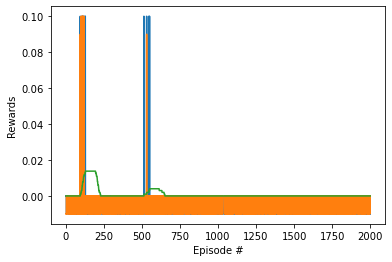

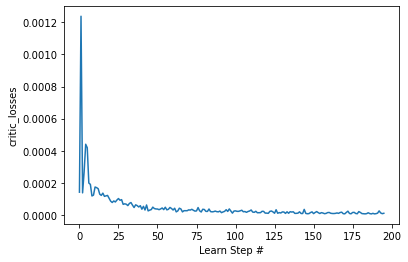

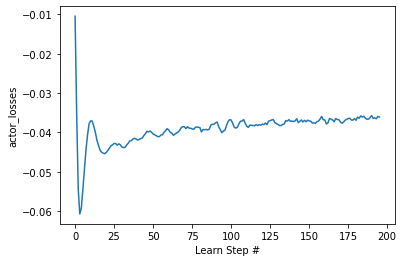

In [6]:
from maddpg import maddpg
import cProfile
DoProfile = False

config = {
    'gamma'               : 0.99,
    'tau'                 : 0.01,
    'action_size'         : action_size,
    'state_size'          : state_size,
    'hidden_size'         : 256,
    'buffer_size'         : 50000,
    'batch_size'          : 512,
    'dropout'             : 0.01,
    'seed'                : 98,
    'max_episodes'        : 2000,
    'learn_every'         : 10,
    'critic_learning_rate': 1e-3,
    'actor_learning_rate' : 1e-3,
    'noise_decay'         : 0.9995,
    'num_agents'          : num_agents,
    'env_file_name'       : env_file_name,
    'train_mode'          : True,
    'brain_name'          : brain_name}

def print_config(config):
    print('Config Parameters    : ')
    for c,k in config.items():
        print('{:20s} : {}'.format(c,k))

# seed_range = [0.1, 0.05, 0.03, 0.01, 0.005, 0.003, 0.001]
for main in range(10):#len(tau_range)):
    config['seed'] += 1
    print_config(config)
    agent = maddpg(env, config)
    if DoProfile:cProfile.run("results = agent.train()",'PerfStats')
    else:results = agent.train()
    # all_rewards,avg_rewards,critic_losses,actor_losses = agent.train()
    print_config(config)
    plot_results(results)


env.close()

# 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```